# 使用torch.nn实现softmax回归

In [35]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
batch_size = 256
num_workers = 2
lr = 0.01
num_epochs = 30

## 1 获取和读取数据

In [36]:
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/fashion', train=True, 
download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/fashion', train=False, 
download=True, transform=transforms.ToTensor())

In [37]:
Num = mnist_train.data.shape[0]
mnist_train, mnist_test

(Dataset FashionMNIST
     Number of datapoints: 60000
     Split: train
     Root Location: /Users/panyuchen/Datasets/fashion
     Transforms (if any): ToTensor()
     Target Transforms (if any): None,
 Dataset FashionMNIST
     Number of datapoints: 10000
     Split: test
     Root Location: /Users/panyuchen/Datasets/fashion
     Transforms (if any): ToTensor()
     Target Transforms (if any): None)

In [38]:
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,
num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, 
num_workers=num_workers)

## 2 定义和初始化模型

In [39]:
num_input = 784
num_output = 10

In [40]:
class LinearNet(nn.Module):
    def __init__(self, n_input, n_output):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_input, n_output)

    def forward(self, x):
        return self.linear(x.view(-1, 784))

Net = LinearNet(num_input, num_output)
Net

LinearNet(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [41]:
from torch.nn import init

init.normal_(Net.linear.weight.data, mean=0, std=0.01)
init.constant_(Net.linear.bias.data, val=0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 3 softmax和交叉熵损失函数

In [42]:
loss = nn.CrossEntropyLoss()

## 4 定义优化算法

In [43]:
import torch.optim as optim
optimizer = optim.SGD(Net.parameters(), lr=lr)

## 5 计算分类准确率

In [44]:
def accuracy_n(y_hat, y): 
    return (y_hat.argmax(dim=1) == y).float().sum().item()

In [45]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

## 6 训练模型

In [46]:
loss_train = []
loss_test = []
acc_train = []
acc_test = []
for epoch in range(1, num_epochs + 1):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        n += 1
        y_hat = Net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad() #梯度梯度清零 等价于net.zero_grad()
        l.backward()
        optimizer.step()
        train_l_sum += l.item()
        train_acc_sum += accuracy_n(y_hat, y)
        
    train_l = (train_l_sum / n)
    loss_train.append(train_l)
    
    train_acc = (train_acc_sum / Num)
    acc_train.append(train_acc)
    
    test_acc = evaluate_accuracy(test_iter, Net)
    acc_test.append(test_acc)
    print("epoch: %d loss: %.3f train_acc: %.3f test_acc: %.3f"%(epoch, train_l, train_acc, test_acc))
      

epoch: 1 loss: 1.360 train_acc: 0.646 test_acc: 0.679
epoch: 2 loss: 0.915 train_acc: 0.716 test_acc: 0.727
epoch: 3 loss: 0.802 train_acc: 0.749 test_acc: 0.743
epoch: 4 loss: 0.742 train_acc: 0.767 test_acc: 0.760
epoch: 5 loss: 0.703 train_acc: 0.780 test_acc: 0.771
epoch: 6 loss: 0.674 train_acc: 0.788 test_acc: 0.777
epoch: 7 loss: 0.651 train_acc: 0.794 test_acc: 0.783
epoch: 8 loss: 0.633 train_acc: 0.799 test_acc: 0.789
epoch: 9 loss: 0.619 train_acc: 0.804 test_acc: 0.792
epoch: 10 loss: 0.606 train_acc: 0.807 test_acc: 0.795
epoch: 11 loss: 0.595 train_acc: 0.809 test_acc: 0.797
epoch: 12 loss: 0.586 train_acc: 0.812 test_acc: 0.801
epoch: 13 loss: 0.578 train_acc: 0.815 test_acc: 0.803
epoch: 14 loss: 0.570 train_acc: 0.816 test_acc: 0.804
epoch: 15 loss: 0.563 train_acc: 0.819 test_acc: 0.807
epoch: 16 loss: 0.557 train_acc: 0.820 test_acc: 0.808
epoch: 17 loss: 0.551 train_acc: 0.822 test_acc: 0.810
epoch: 18 loss: 0.546 train_acc: 0.823 test_acc: 0.812
epoch: 19 loss: 0.5

Text(0.5, 1.0, 'acc_test')

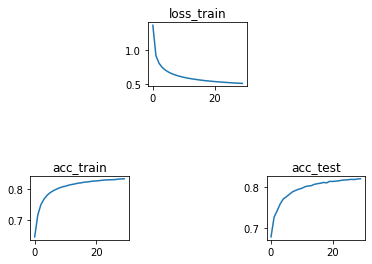

In [47]:
plt.subplot(3,3,2)
plt.plot(range(num_epochs), loss_train)
plt.title('loss_train')
plt.subplot(3,3,7)
plt.plot(range(num_epochs), acc_train)
plt.title('acc_train')
plt.subplot(3,3,9)
plt.plot(range(num_epochs), acc_test)
plt.title('acc_test')

Ankle boot
Ankle boot


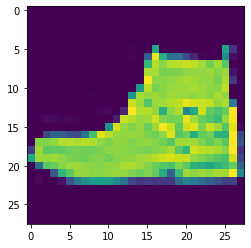

In [54]:
test_num = 10
test_image = torch.utils.data.DataLoader(mnist_test, batch_size=test_num, shuffle=True, 
num_workers=num_workers)
label = mnist_test.classes
for X, y in test_image:
    print(label[y[0]])
    print(label[Net(X).argmax(dim=1)[0]])
    plt.imshow(X[0].view(28, 28))
    break